In [1]:
import pandas as pd
import matplotlib.pyplot as plt  


1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [2]:
ncc_df=pd.read_excel('C:\\Users\\emmal\\Documents\\NSS\\Projects\\advanced-pandas-emmydoore\\data\\Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [3]:
#ncc_df=ncc_df.dropna()
ncc_df.head()
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


2. **Most Common Causes of Death.**  

a. Find the 10 most common (known) recorded causes of death.

In [4]:
#note: found that tilde ~ in front of df means NOT  
#https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

#ran: ncc_df['Cause of Death/Burial'].value_counts().head(10) --> Need to fix 'Unknown' 'Not Known'
ncc_df=ncc_df[~ncc_df['Cause of Death/Burial'].isin(['Unknown','Not Known'])]
ncc_df['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64

b. Clean up some of the misspellings.Use the [`replace` method] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".


In [5]:
ncc_df=ncc_df.replace({'Cause of Death/Burial' : {'Cholrea':'Cholera','Still Born':'Stillborn'}})
top_deaths=ncc_df['Cause of Death/Burial'].value_counts().head(10)
print(top_deaths)

Cause of Death/Burial
Consumption     1767
Unknown         1260
Cholera         1242
Stillborn        926
Not Known        639
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Name: count, dtype: int64


c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

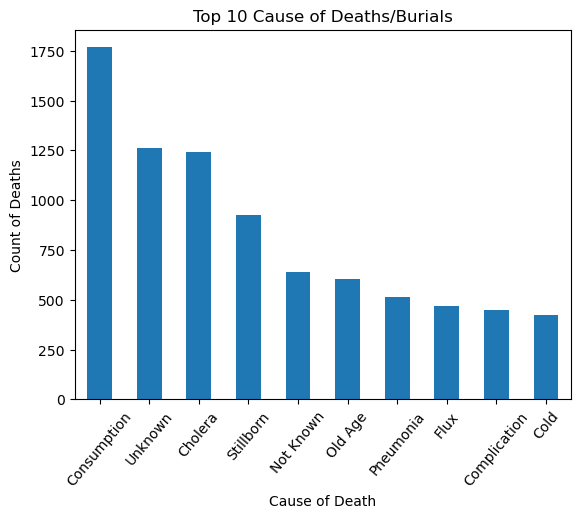

In [6]:
top_deaths.plot.bar(x='Cause of Death/Burial')
plt.title('Top 10 Cause of Deaths/Burials')
plt.xlabel('Cause of Death')
plt.ylabel('Count of Deaths')
plt.xticks(rotation = 50);

**Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings. 

3. Create a line chart showing the number of burials per year.


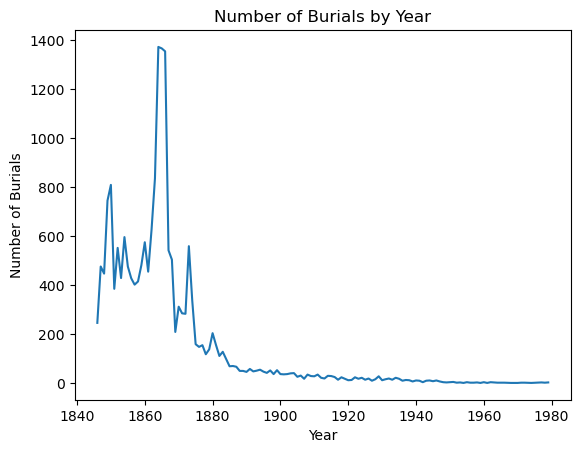

In [7]:
burial_count=ncc_df['Burial Year'].value_counts().sort_index()
burial_count.plot(kind= 'line')
plt.ylabel('Number of Burials')
plt.xlabel('Year')
plt.title('Number of Burials by Year');


4. **Burials per Month and Year** 

a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  

In [8]:
pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])


Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,22,0,30,26,20,0,0,25,26,23,39,35
1847.0,35,61,34,34,43,40,47,38,26,36,47,35
1848.0,37,39,27,36,36,65,47,49,41,21,26,23
1849.0,43,36,33,64,46,96,231,64,62,24,18,28
1850.0,29,52,31,26,24,370,120,43,37,28,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,1,0,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,1,0,0
1977.0,0,0,0,0,0,0,0,1,1,1,0,0


b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  

In [12]:

#cross['Burial Year']=cross['Burial Year'].astype(int)
cross=pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#sort months in order according to months list
cross=cross.reindex(months, axis="columns")
cross.index=cross.index.map(int)
print(cross)


Burial Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Burial Year                                                             
1846           20   26   25   22   26    0    0    0   35   39   23   30
1847           43   34   38   35   26   47   40   61   35   47   36   34
1848           36   36   49   37   41   47   65   39   23   26   21   27
1849           46   64   64   43   62  231   96   36   28   18   24   33
1850           24   26   43   29   37  120  370   52   22   27   28   31
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1972            0    0    0    1    0    0    0    0    0    0    0    0
1974            0    0    0    0    0    0    0    0    0    0    1    0
1977            0    0    1    0    1    0    0    0    0    0    1    0
1978            0    0    0    0    0    0    0    2    0    0    0    0
1979            0    0    0    0    1    0    0    1    1    0    0    0

[128 rows x 12 columns]


c. Filter your table to show only the years 1846 through 1860.

In [23]:
ncc_copy=ncc_df

#years 1846-1860
ncc_copy=ncc_copy[(ncc_copy['Burial Year'] >=1846) & (ncc_copy['Burial Year']<=1860)]

#new cross tab with filtered burial years

cross_2=pd.crosstab(ncc_copy['Burial Year'],ncc_copy['Burial Month'])
cross_2=cross_2.reindex(months, axis="columns")
cross_2.index=cross_2.index.map(int)

print(cross_2)

Burial Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Burial Year                                                             
1846           20   26   25   22   26    0    0    0   35   39   23   30
1847           43   34   38   35   26   47   40   61   35   47   36   34
1848           36   36   49   37   41   47   65   39   23   26   21   27
1849           46   64   64   43   62  231   96   36   28   18   24   33
1850           24   26   43   29   37  120  370   52   22   27   28   31
1851           26   31   27   29   26   37   49   35   32   42   14   37
1852           37   32   39   37   58   84   76   54   31   32   36   36
1853           35   39   35   31   36   54   47   32   34   27   28   31
1854           35   33   34   43   61  137   95   44   34   25   25   30
1855           30   22   20   34   38   58   75   42   54   33   32   38
1856           29   34   30   33   35   42   51   37   38   43   28   28
1857           31   34   34   34   34   37   36   3

d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [13]:
#month that had the most deaths (Sep)
month_max=cross.max()

#finding the year where that month had the max deaths (1866)
cross[cross['Sep']== max(month_max)]

sep_1886=ncc_df.loc[(ncc_df['Burial Year'] == 1866) & (ncc_df['Burial Month'] == 'Sep')]
sep_1886['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Cholera          327
Flux              11
Consumption       11
Unknown            9
Diarrhaea          9
Teething           8
Old Age            6
Stil Born          5
Typhoid Fever      4
Inf of Bowls       3
Name: count, dtype: int64

    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  

5. **Burials per Decade** 

a. Create a "Decade" column to show the decade in which a burial occurred.

In [25]:
#makes decade column

ncc_df['Decade']=(ncc_df['Burial Year']//10)*10
ncc_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade,Age Group,Year Group
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970.0,0-18,After 1920
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970.0,65+,After 1920
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970.0,65+,After 1920
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1970.0,65+,After 1920
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970.0,65+,After 1920


b.Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.

In [26]:
#filters gender
# | = OR
gender=ncc_df[(ncc_df['Sex'] =='M') | (ncc_df['Sex'] == 'F')]

#m/f by decade
g_df=pd.crosstab(gender['Decade'],gender['Sex'])
g_df.index=g_df.index.map(int)

#making a total column
g_df['Total']=g_df['F']+g_df['M']

#proportion column
g_df["% Female"]=round((g_df['F']/g_df['Total'])*100,2)
g_df["% Male"]=round((g_df['M']/g_df['Total'])*100,2)

g_df.head(14)

Sex,F,M,Total,% Female,% Male
Decade,,,,,
1840,869,1034,1903,45.66,54.34
1850,2244,2629,4873,46.05,53.95
1860,3744,4063,7807,47.96,52.04
1870,1226,1208,2434,50.37,49.63
1880,507,467,974,52.05,47.95
1890,245,230,475,51.58,48.42
1900,167,157,324,51.54,48.46
1910,129,108,237,54.43,45.57
1920,95,80,175,54.29,45.71


c. Create a clustered bar chart to show how male and female burials have changed over time.

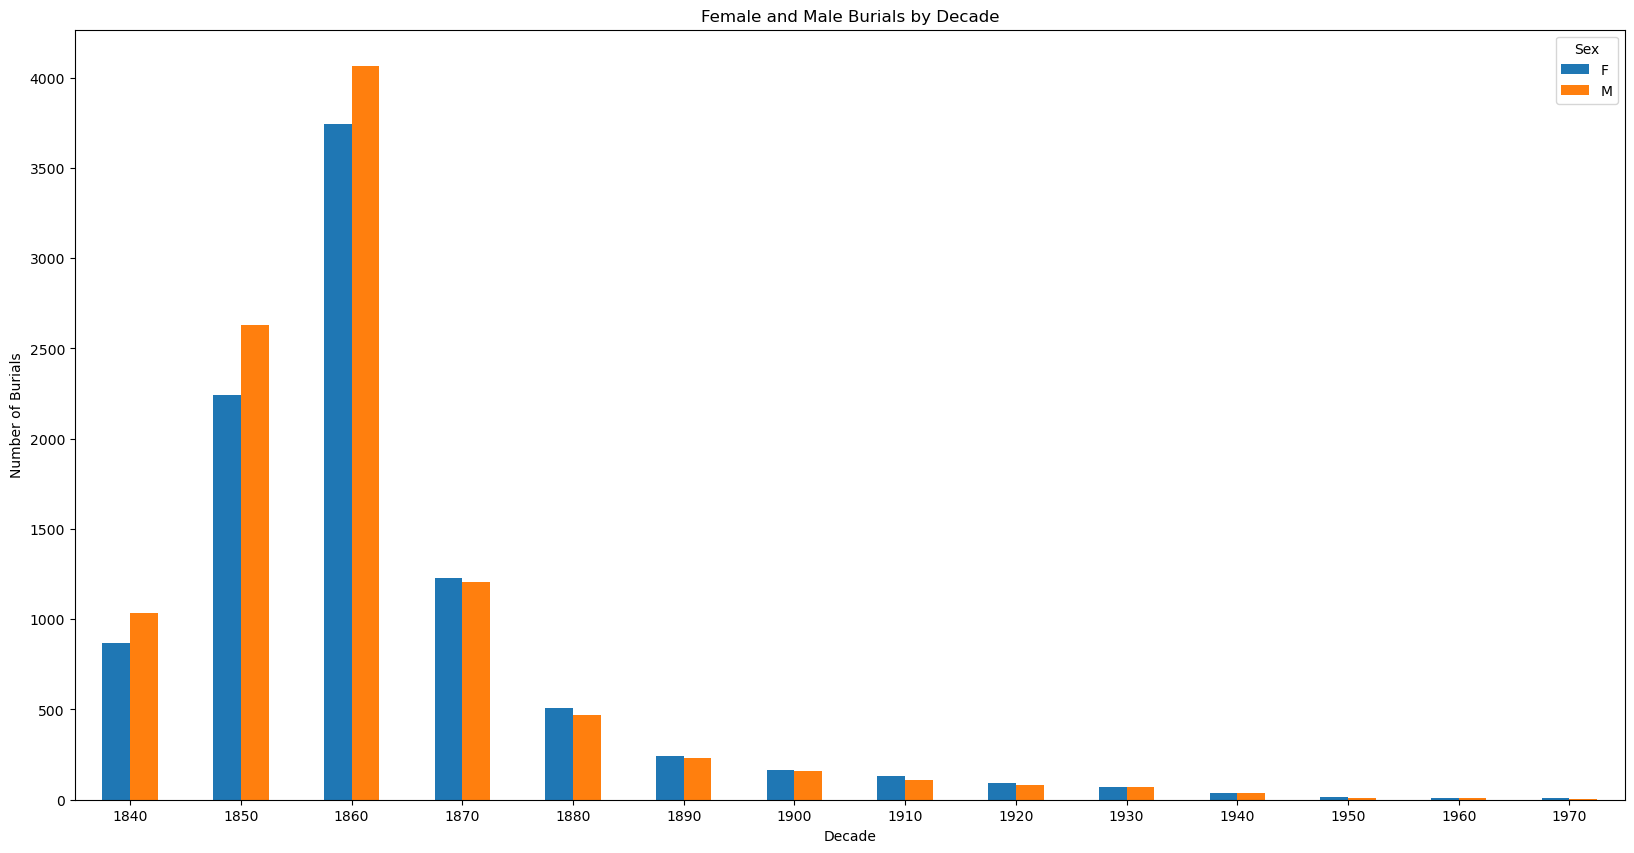

In [28]:
bar_df=pd.crosstab(gender['Decade'],gender['Sex'])
bar_df.index=bar_df.index.map(int)

bar_df.plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=360)
plt.ylabel('Number of Burials')
plt.title('Female and Male Burials by Decade');

### Bonus Questions

6. **Burials per Age Group**

a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  

In [17]:
ncc_df['Age Group']=pd.qcut(ncc_df.loc[:, ('Age')],5,labels=['0-18', '19-25', '26-40', '41-64','65+'])
ncc_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade,Age Group
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970.0,0-18
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970.0,65+
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970.0,65+
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1970.0,65+
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970.0,65+


b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920. 

In [18]:
ncc_df['Year Group']=pd.qcut(ncc_df.loc[:, ('Burial Year')],4,labels=[ 'Before 1880', '1880-1900', '1901-1920', 'After 1920'])
ncc_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade,Age Group,Year Group
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970.0,0-18,After 1920
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970.0,65+,After 1920
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970.0,65+,After 1920
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,1970.0,65+,After 1920
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970.0,65+,After 1920


c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

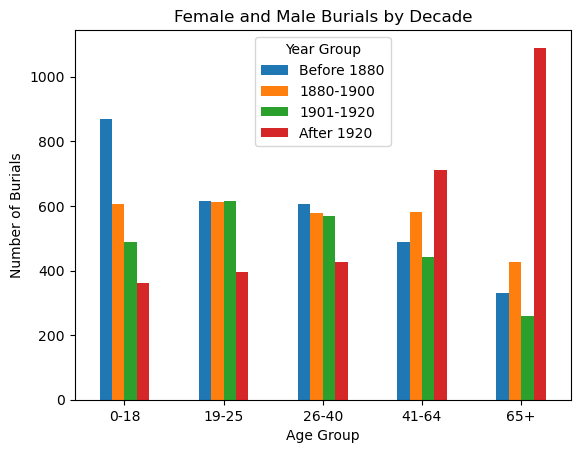

In [32]:
age_df=pd.crosstab(ncc_df['Age Group'],ncc_df['Year Group'])

age_df.plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Number of Burials')
plt.title('Burials per Age Group');

7. **Last Names** 

a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma. 

b. What are the most common last names that appear?


8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    


   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  


   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   


   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  


   d.  Find the mean age for each age group.    


   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.